# Car Sales Analysis & Prediction

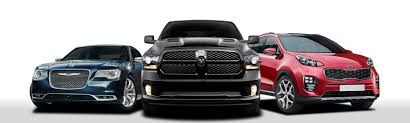

### Step 1: Loading the dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

C:\Users\User\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\User\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


### Step 2: Data Loading

In [10]:
"""
file_path = 'linear_regression_car_sales.xlsx'

sheet_name = 'car_sales'

df = pd.read_excel(file_path)
"""

file_path = 'car_sales_data.csv'
df = pd.read_csv(file_path)

In [11]:
# Load th top 5 records of the data
df.head()

,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Sales ($),Dealer_No,Body Style,Phone,Dealer_Region
0,C_CND_000001,01/02/2022,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown
1,C_CND_000002,01/02/2022,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora
2,C_CND_000003,01/02/2022,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,38701-8047,Passenger,7298798,Greenville
3,C_CND_000004,01/02/2022,Giselle,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,99301-3882,SUV,6257557,Pasco
4,C_CND_000005,01/02/2022,Grace,Male,1465000,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Red,24500,53546-9427,Hatchback,7081483,Janesville


In [12]:
# Display the last 5 records
df.tail()

,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Sales ($),Dealer_No,Body Style,Phone,Dealer_Region
23901,C_CND_023902,12/31/2023,Martin,Male,13500,C & M Motors Inc,Plymouth,Voyager,Overhead Camshaft,Manual,Red,12000,60504-7114,Passenger,8583598,Pasco
23902,C_CND_023903,12/31/2023,Jimmy,Female,900000,Ryder Truck Rental and Leasing,Chevrolet,Prizm,DoubleÂ Overhead Camshaft,Auto,Black,16000,06457-3834,Hardtop,7914229,Middletown
23903,C_CND_023904,12/31/2023,Emma,Male,705000,Chrysler of Tri-Cities,BMW,328i,Overhead Camshaft,Manual,Red,21000,99301-3882,Sedan,7659127,Scottsdale
23904,C_CND_023905,12/31/2023,Victoire,Male,13500,Chrysler Plymouth,Chevrolet,Metro,DoubleÂ Overhead Camshaft,Auto,Black,31000,53546-9427,Passenger,6030764,Austin
23905,C_CND_023906,12/31/2023,Donovan,Male,1225000,Pars Auto Sales,Lexus,ES300,DoubleÂ Overhead Camshaft,Auto,Pale White,27500,38701-8047,Hardtop,7020564,Middletown


In [13]:
# Information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23906 entries, 0 to 23905
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Car_id         23906 non-null  object
 1   Date           23906 non-null  object
 2   Customer Name  23905 non-null  object
 3   Gender         23906 non-null  object
 4   Annual Income  23906 non-null  int64 
 5   Dealer_Name    23906 non-null  object
 6   Company        23906 non-null  object
 7   Model          23906 non-null  object
 8   Engine         23906 non-null  object
 9   Transmission   23906 non-null  object
 10  Color          23906 non-null  object
 11  Sales ($)      23906 non-null  int64 
 12  Dealer_No      23906 non-null  object
 13  Body Style     23906 non-null  object
 14  Phone          23906 non-null  int64 
 15  Dealer_Region  23906 non-null  object
dtypes: int64(3), object(13)
memory usage: 2.9+ MB


In [14]:
# Descriptive statitics of the data
df.describe()

,Annual Income,Sales ($),Phone
count,2.390600e+04,23906.000000,2.390600e+04
mean,8.308403e+05,28090.247846,7.497741e+06
std,7.200064e+05,14788.687608,8.674920e+05
min,1.008000e+04,1200.000000,6.000101e+06
25%,3.860000e+05,18001.000000,6.746495e+06
50%,7.350000e+05,23000.000000,7.496198e+06
75%,1.175750e+06,34000.000000,8.248146e+06
max,1.120000e+07,85800.000000,8.999579e+06


In [16]:
# Shape of the data
df.shape

(23906, 16)

In [17]:
# Missing Values
df.isnull().sum()

Car_id           0
Date             0
Customer Name    1
Gender           0
Annual Income    0
Dealer_Name      0
Company          0
Model            0
Engine           0
Transmission     0
Color            0
Sales ($)        0
Dealer_No        0
Body Style       0
Phone            0
Dealer_Region    0
dtype: int64

### Data Transformation/Wrangling

In [18]:
df.columns

Index(['Car_id', 'Date', 'Customer Name', 'Gender', 'Annual Income',
       'Dealer_Name', 'Company', 'Model', 'Engine', 'Transmission', 'Color',
       'Sales ($)', 'Dealer_No ', 'Body Style', 'Phone', 'Dealer_Region'],
      dtype='object')

In [19]:
# Displaying the datatypes
df.dtypes

Car_id           object
Date             object
Customer Name    object
Gender           object
Annual Income     int64
Dealer_Name      object
Company          object
Model            object
Engine           object
Transmission     object
Color            object
Sales ($)         int64
Dealer_No        object
Body Style       object
Phone             int64
Dealer_Region    object
dtype: object

In [20]:
# Converting columns name to lower case
df.columns = df.columns.str.lower()
df.columns

Index(['car_id', 'date', 'customer name', 'gender', 'annual income',
       'dealer_name', 'company', 'model', 'engine', 'transmission', 'color',
       'sales ($)', 'dealer_no ', 'body style', 'phone', 'dealer_region'],
      dtype='object')

In [30]:
# Converting the date column to a proper datetime column

df['date'] = pd.to_datetime(df['date'], format = '%d/%m/%Y')
df['date']

0       2022-01-02
1       2022-01-02
2       2022-01-02
3       2022-01-02
4       2022-01-02
           ...    
23901   2023-12-31
23902   2023-12-31
23903   2023-12-31
23904   2023-12-31
23905   2023-12-31
Name: date, Length: 23906, dtype: datetime64[ns]

In [28]:
# Checking the datatype again
df.dtypes

car_id                   object
date             datetime64[ns]
customer name            object
gender                   object
annual income             int64
dealer_name              object
company                  object
model                    object
engine                   object
transmission             object
color                    object
sales ($)                 int64
dealer_no                object
body style               object
phone                     int64
dealer_region            object
dtype: object

In [33]:
# Replacing missing value --> customer name

df[df['customer name'].isnull()]

,car_id,date,customer name,gender,annual income,dealer_name,company,model,engine,transmission,color,sales ($),dealer_no,body style,phone,dealer_region
7564,C_CND_007565,2022-11-05,NaN,Male,680000,Saab-Belle Dodge,Dodge,Ram Pickup,DoubleÂ Overhead Camshaft,Auto,Pale White,45000,60504-7114,Hardtop,7203103,Aurora


In [38]:
df['customer name'] = df['customer name'].fillna('None', axis = 0)

In [40]:
df.isnull().sum()

car_id           0
date             0
customer name    0
gender           0
annual income    0
dealer_name      0
company          0
model            0
engine           0
transmission     0
color            0
sales ($)        0
dealer_no        0
body style       0
phone            0
dealer_region    0
dtype: int64

### Step 3: Exploratory Data Analysis (EDA)

In [41]:
df.head()

,car_id,date,customer name,gender,annual income,dealer_name,company,model,engine,transmission,color,sales ($),dealer_no,body style,phone,dealer_region
0,C_CND_000001,2022-01-02,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown
1,C_CND_000002,2022-01-02,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora
2,C_CND_000003,2022-01-02,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,38701-8047,Passenger,7298798,Greenville
3,C_CND_000004,2022-01-02,Giselle,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,99301-3882,SUV,6257557,Pasco
4,C_CND_000005,2022-01-02,Grace,Male,1465000,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Red,24500,53546-9427,Hatchback,7081483,Janesville


gender
Male      18798
Female     5108
Name: count, dtype: int64


Text(0, 0.5, 'Gender Frequency')

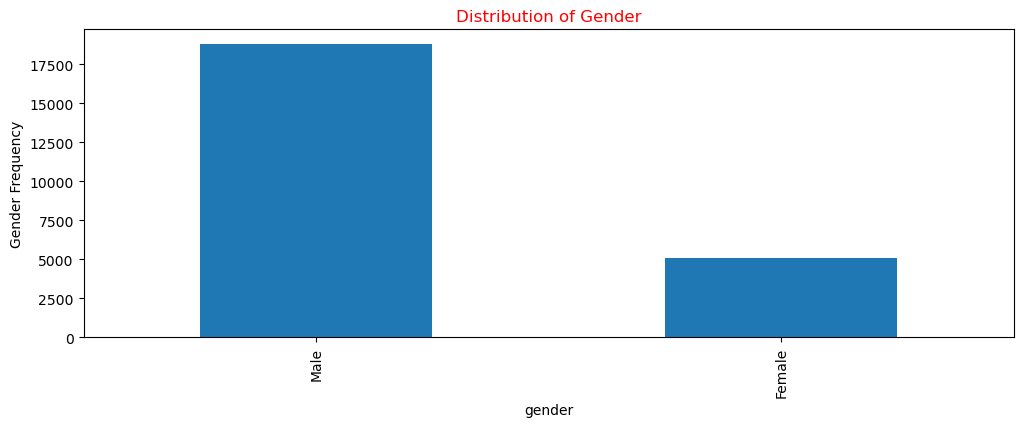

In [54]:
# which gender purchase car the most

print(df['gender'].value_counts())

plt.figure(figsize = (12,4))
df['gender'].value_counts().plot(kind = 'bar')
plt.title('Distribution of Gender', color = 'red')
plt.ylabel('Gender Frequency')

dealer_name
Progressive Shippers Cooperative Association No    1318
Rabun Used Car Sales                               1313
Race Car Help                                      1253
Saab-Belle Dodge                                   1251
Star Enterprises Inc                               1249
Name: count, dtype: int64


Text(0, 0.5, 'Frequency')

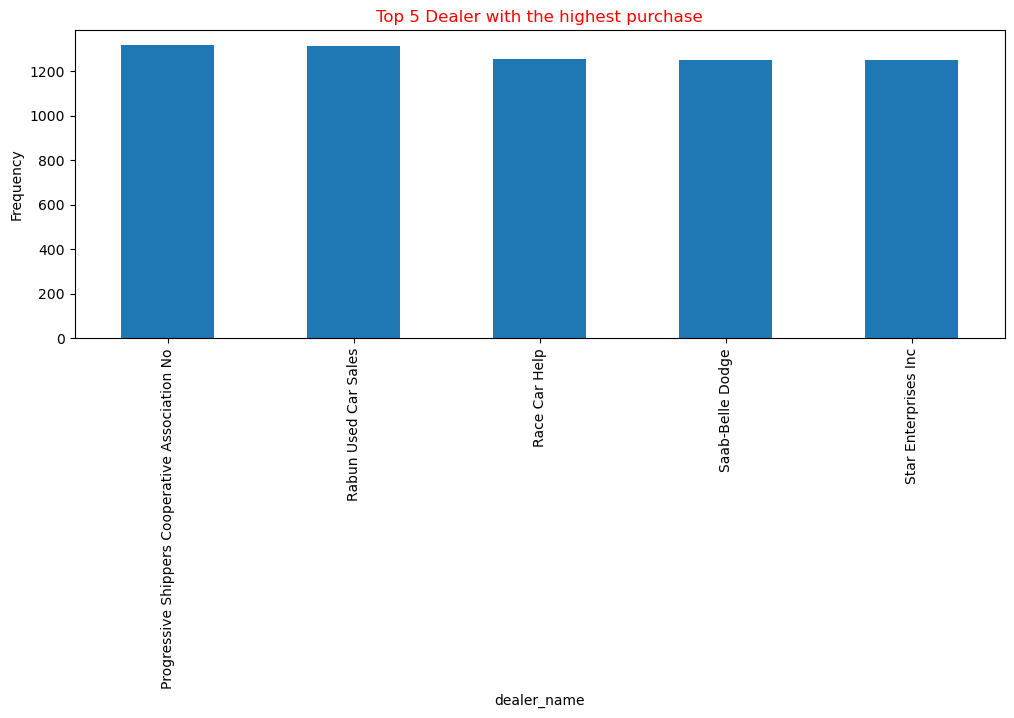

In [63]:
# Which dealer has the highest purchase

print(df['dealer_name'].value_counts().head())

plt.figure(figsize = (12,4))
df['dealer_name'].value_counts().head().plot(kind = 'bar')
plt.title('Top 5 Dealer with the highest purchase', color = 'red')
plt.ylabel('Frequency')

color
Pale White    11256
Black          7857
Red            4793
Name: count, dtype: int64


<AxesSubplot:ylabel='count'>

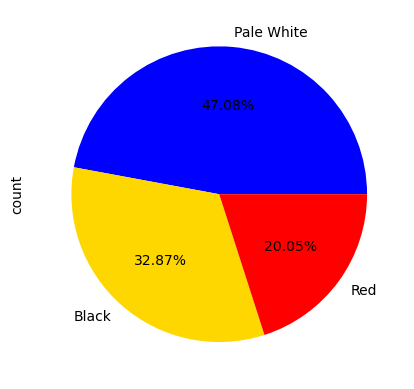

In [74]:
# Which color do they purchase the most?

print(df['color'].value_counts())

color = ['blue', 'gold', 'red']
df['color'].value_counts().plot(kind = 'pie', colors = color, autopct = '%1.2f%%')

In [75]:
df.columns

Index(['car_id', 'date', 'customer name', 'gender', 'annual income',
       'dealer_name', 'company', 'model', 'engine', 'transmission', 'color',
       'sales ($)', 'dealer_no ', 'body style', 'phone', 'dealer_region'],
      dtype='object')

In [77]:
# Sales By Gender

df.groupby('gender')['sales ($)'].sum()

gender
Female    144440271
Male      527085194
Name: sales ($), dtype: int64

<AxesSubplot:ylabel='sales ($)'>

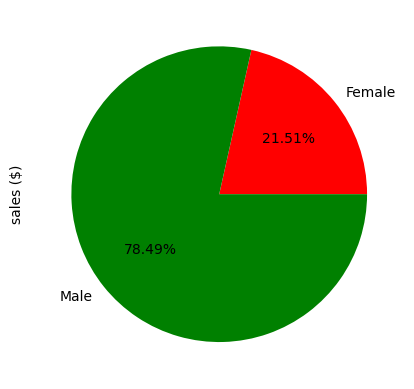

In [79]:
color = ['red', 'green']
df.groupby('gender')['sales ($)'].sum().plot(kind = 'pie', colors = color, autopct = '%1.2f%%')

### Correlation

In [82]:
# Selecting only the numerical columns
numerical_columns = df.select_dtypes(include = ['int', 'float'])

# numerical_columns = df.select_dtypes(exclude = 'objects') --> to remove object datatypes
numerical_columns.drop('phone', axis = 1, inplace = True)
numerical_columns

,annual income,sales ($)
0,13500,26000
1,1480000,19000
2,1035000,31500
3,13500,14000
4,1465000,24500
...,...,...
23901,13500,12000
23902,900000,16000
23903,705000,21000
23904,13500,31000


In [83]:
# Is the annual affecting the sales
numerical_columns.corr()

,annual income,sales ($)
annual income,1.000000,0.012065
sales ($),0.012065,1.000000


### Step 4: Data Preparation for Prediction

In [84]:
df.columns

Index(['car_id', 'date', 'customer name', 'gender', 'annual income',
       'dealer_name', 'company', 'model', 'engine', 'transmission', 'color',
       'sales ($)', 'dealer_no ', 'body style', 'phone', 'dealer_region'],
      dtype='object')

In [87]:
# creating a new dataframe

df2 = df.drop(['car_id', 'date', 'customer name','engine', 'company', 'dealer_name', 'dealer_no ','phone'], axis = 1)
df2

,gender,annual income,model,transmission,color,sales ($),body style,dealer_region
0,Male,13500,Expedition,Auto,Black,26000,SUV,Middletown
1,Male,1480000,Durango,Auto,Black,19000,SUV,Aurora
2,Male,1035000,Eldorado,Manual,Red,31500,Passenger,Greenville
3,Male,13500,Celica,Manual,Pale White,14000,SUV,Pasco
4,Male,1465000,TL,Auto,Red,24500,Hatchback,Janesville
...,...,...,...,...,...,...,...,...
23901,Male,13500,Voyager,Manual,Red,12000,Passenger,Pasco
23902,Female,900000,Prizm,Auto,Black,16000,Hardtop,Middletown
23903,Male,705000,328i,Manual,Red,21000,Sedan,Scottsdale
23904,Male,13500,Metro,Auto,Black,31000,Passenger,Austin


### Splitting the data into Dependent and Independent Variable

In [108]:
dependent = df2['sales ($)']
independent = df2.drop(['sales ($)', 'model', 'dealer_region'], axis = 1)

In [109]:
# Passing into X and y
X = independent
y = dependent

In [110]:
X.head()

,gender,annual income,transmission,color,body style
0,Male,13500,Auto,Black,SUV
1,Male,1480000,Auto,Black,SUV
2,Male,1035000,Manual,Red,Passenger
3,Male,13500,Manual,Pale White,SUV
4,Male,1465000,Auto,Red,Hatchback


### Step 5: Data Preprocessing

#### 5. 1 Encoding the categorical column to numbers

In [114]:
# Encoding the gender column
X['gender'] = df['gender'].map({
    'Male': 1,
    'Female': 0
})

# Encoding the transmission column
X['transmission'] = df['transmission'].map({
    'Auto': 1,
    'Manual': 0
})

# Encoding the color column
X['color'] = df['color'].map({
    'Pale White': 0,
    'Red': 1,
    'Black': 2
})

# Encoding the Body Style column
X['body style'] = df['body style'].map({
    'SUV': 0, 
    'Passenger': 1, 
    'Hatchback': 2, 
    'Hardtop': 3, 
    'Sedan': 4
})

In [115]:
X.head()

,gender,annual income,transmission,color,body style
0,1,13500,1,2,0
1,1,1480000,1,2,0
2,1,1035000,0,1,1
3,1,13500,0,0,0
4,1,1465000,1,1,2


#### 5.2 Scaling the Data using StandarScaler

In [118]:
from sklearn.preprocessing import StandardScaler # MinMaxScaler

scaler = StandardScaler()
scaler

StandardScaler()

In [119]:
# Fit & Transform our X variable
scaledX = scaler.fit_transform(X)
scaledX

array([[ 0.52127827, -1.1352085 ,  0.94956752,  1.29385472, -1.2529157 ],
       [ 0.52127827,  0.90162156,  0.94956752,  1.29385472, -1.2529157 ],
       [ 0.52127827,  0.28355857, -1.053111  ,  0.16106252, -0.55742035],
       ...,
       [ 0.52127827, -0.17478028, -1.053111  ,  0.16106252,  1.5290657 ],
       [ 0.52127827, -1.1352085 ,  0.94956752,  1.29385472, -0.55742035],
       [ 0.52127827,  0.54745064,  0.94956752, -0.97172968,  0.83357035]])

#### 5.3 Split into training set and testing set

In [120]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(scaledX, y, test_size = 0.2, random_state = 42)

display(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(19124, 5)

(4782, 5)

(19124,)

(4782,)

#### 5.4 Model Build --> Linear Regression

In [121]:
from sklearn.linear_model import LinearRegression

regress = LinearRegression()
regress

LinearRegression()

In [122]:
regress.fit(X_train, y_train)

LinearRegression()

In [123]:
y_pred = regress.predict(X_test)
display(y_test, y_pred)

3393     19500
516      46000
536      39000
16108    17500
18911    22000
         ...  
16796    27000
16839    20001
15003    15000
3171     82000
13053    25000
Name: sales ($), Length: 4782, dtype: int64

array([28681.85575075, 28372.91678253, 28544.24951804, ...,
       29141.77726887, 27534.43221975, 26605.90249948])

In [126]:
from sklearn.metrics import r2_score

In [127]:
print(r2_score(y_test, y_pred))

0.005126176548468142


In [132]:
regress.score(X_train, y_train)

0.00556287722235127

The model did not perform well which means we cannot deploy this model.Looking at the score, we cannot make use of this model in predicting the sales of the company.